# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Answer:
The data represents information collected from 17 campaigns that occurred  between May 2008 and November 2010, corresponding to a total of 79354 contacts.
For each contact, a large number of attributes was stored and if there was a success (the target variable).
For the whole database considered, there were 6499 successes (8% success rate)


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys

import time
time.time()

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_auc_score,f1_score

In [2]:
df_bank_full = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df_bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df_bank_full.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
for columns in df_bank_full.select_dtypes(include = "object"):
    unique_values = df_bank_full[columns].unique()
    print(f"unique values in '{columns}': {unique_values}")

unique values in 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
unique values in 'marital': ['married' 'single' 'divorced' 'unknown']
unique values in 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
unique values in 'default': ['no' 'unknown' 'yes']
unique values in 'housing': ['no' 'yes' 'unknown']
unique values in 'loan': ['no' 'yes' 'unknown']
unique values in 'contact': ['telephone' 'cellular']
unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
unique values in 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']
unique values in 'poutcome': ['nonexistent' 'failure' 'success']
unique values in 'y': ['no' 'yes']


In [7]:
df_bank_full.select_dtypes(include = "object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [8]:
df_bank_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df_bank_full.select_dtypes(exclude= "object")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


### Data Visualization: Plot Barplot, Histogram, Boxplot and Scatterplot to visualize numerical, categorical, and binary data

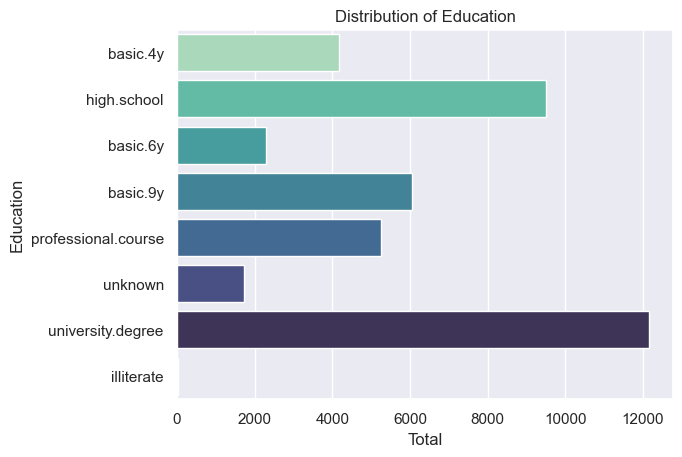

In [10]:
sns.set_theme(style="darkgrid")
sns.countplot(y="education", data=df_bank_full, palette="mako_r")
plt.title('Distribution of Education')
plt.ylabel('Education')
plt.xlabel('Total')
plt.show()

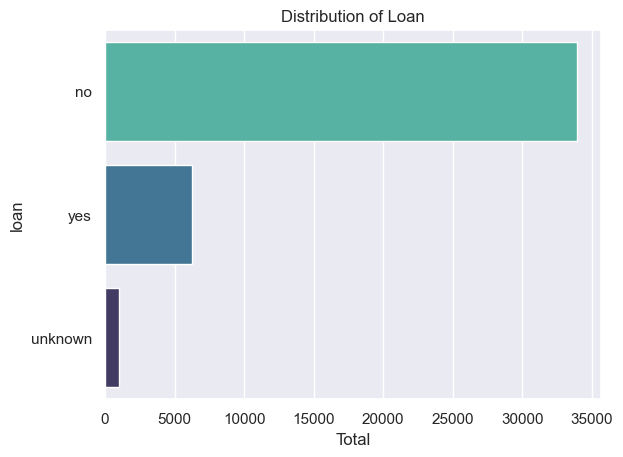

In [11]:
sns.set_theme(style="darkgrid")
sns.countplot(y="loan", data=df_bank_full, palette="mako_r")
plt.ylabel('loan')
plt.xlabel('Total')
plt.title('Distribution of Loan')
plt.show()

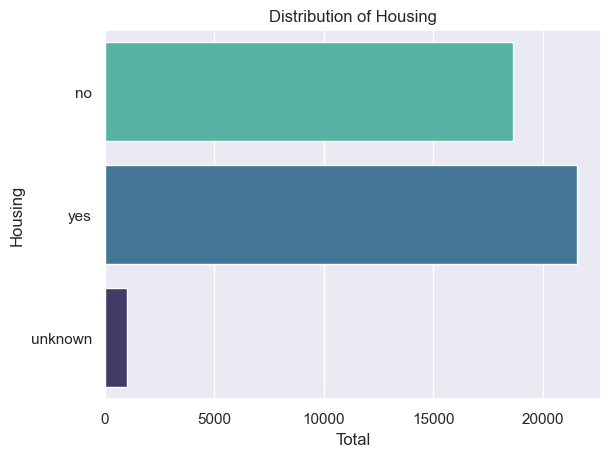

In [12]:
sns.set_theme(style="darkgrid")
sns.countplot(y="housing", data=df_bank_full, palette="mako_r")
plt.ylabel('Housing')
plt.xlabel('Total')
plt.title('Distribution of Housing')
plt.show()

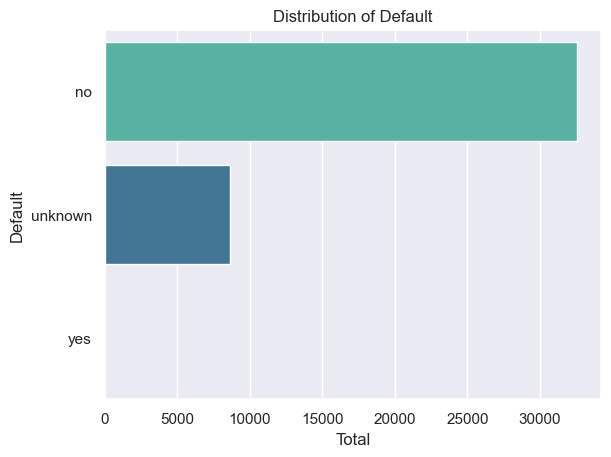

In [13]:
sns.set_theme(style="darkgrid")
sns.countplot(y="default", data=df_bank_full, palette="mako_r")
plt.title('Distribution of Default')
plt.ylabel('Default')
plt.xlabel('Total')
plt.show()

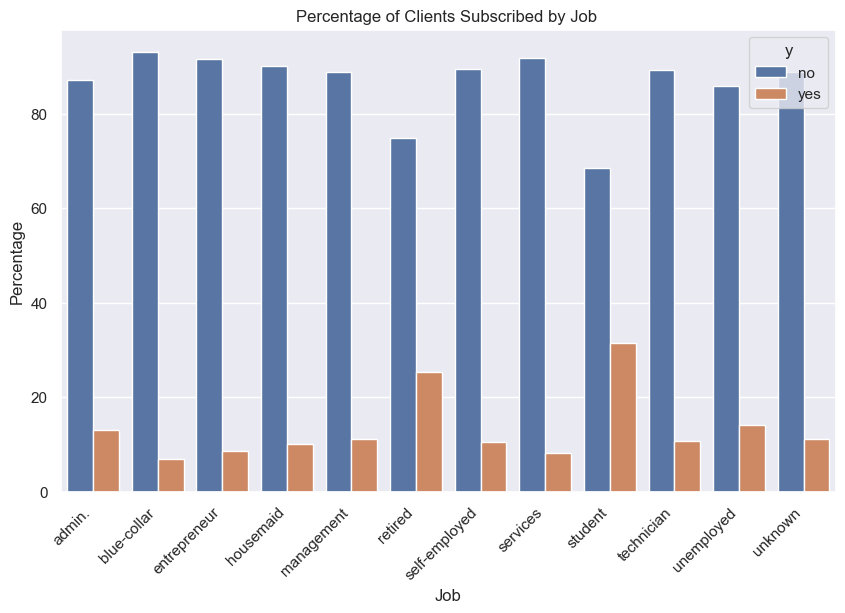

In [14]:
colors = ['#FFB90F', '#33FFA8']
grouped = df_bank_full.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Percentage of Clients Subscribed by Job ')
plt.ylabel('Percentage')
plt.xlabel('Job')
plt.show()

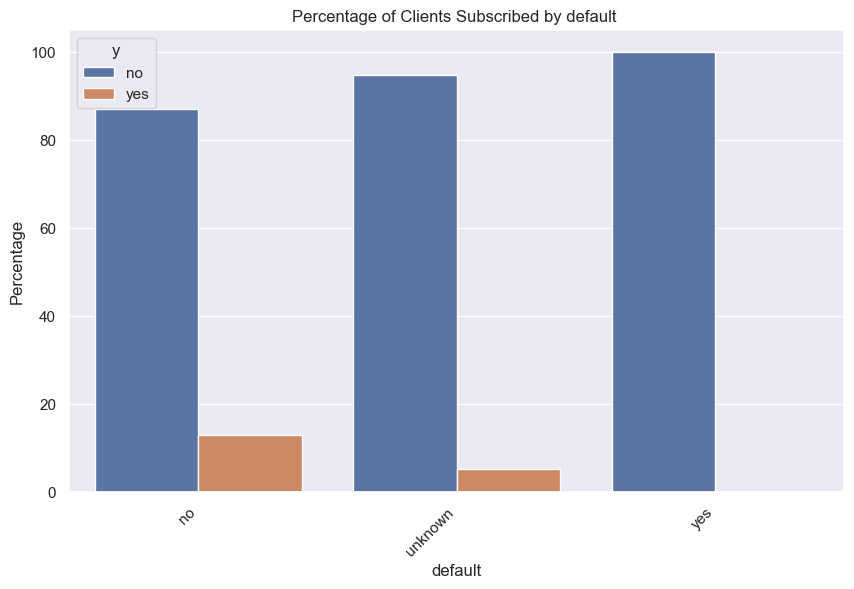

In [15]:
colors = ['#FFB90F', '#33FFA8']
grouped = df_bank_full.groupby('default')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='default', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Percentage of Clients Subscribed by default ')
plt.ylabel('Percentage')
plt.xlabel('default')
plt.show()

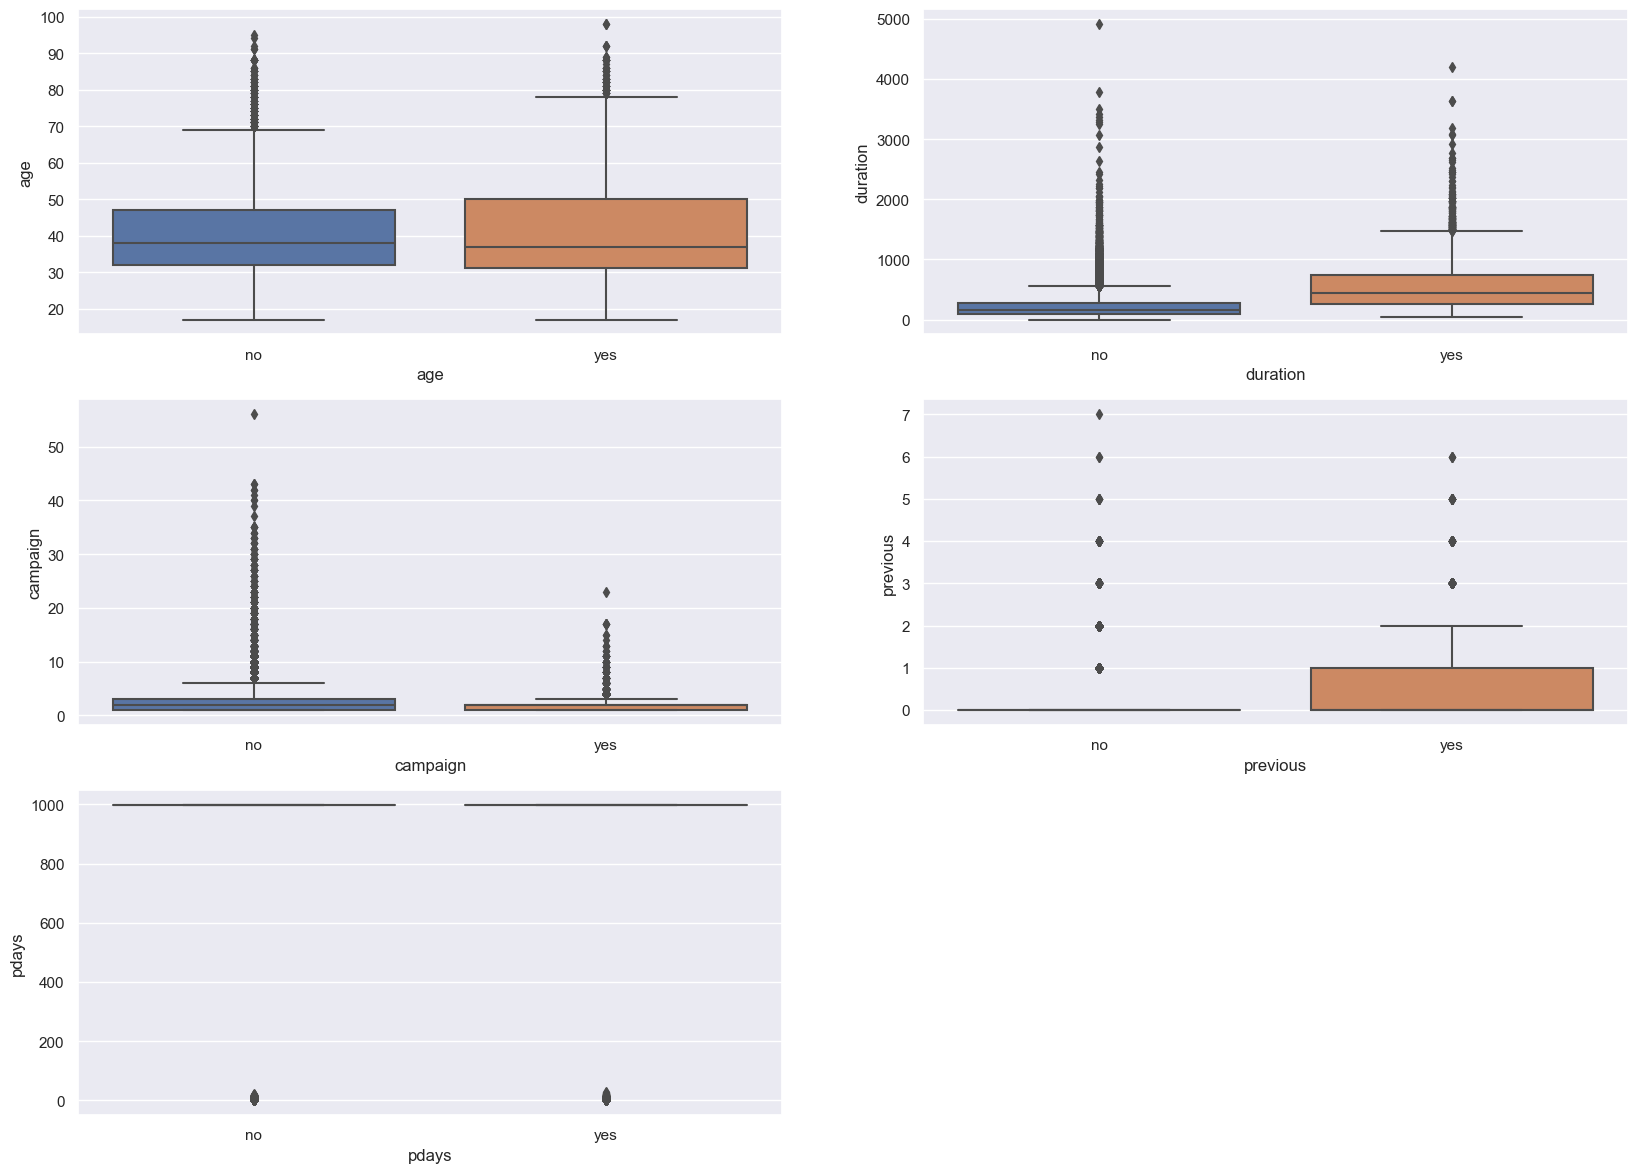

In [16]:
num_features = ['age','duration','campaign','previous','pdays']

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.boxplot(x="y", y= df_bank_full[feature], data=df_bank_full)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()



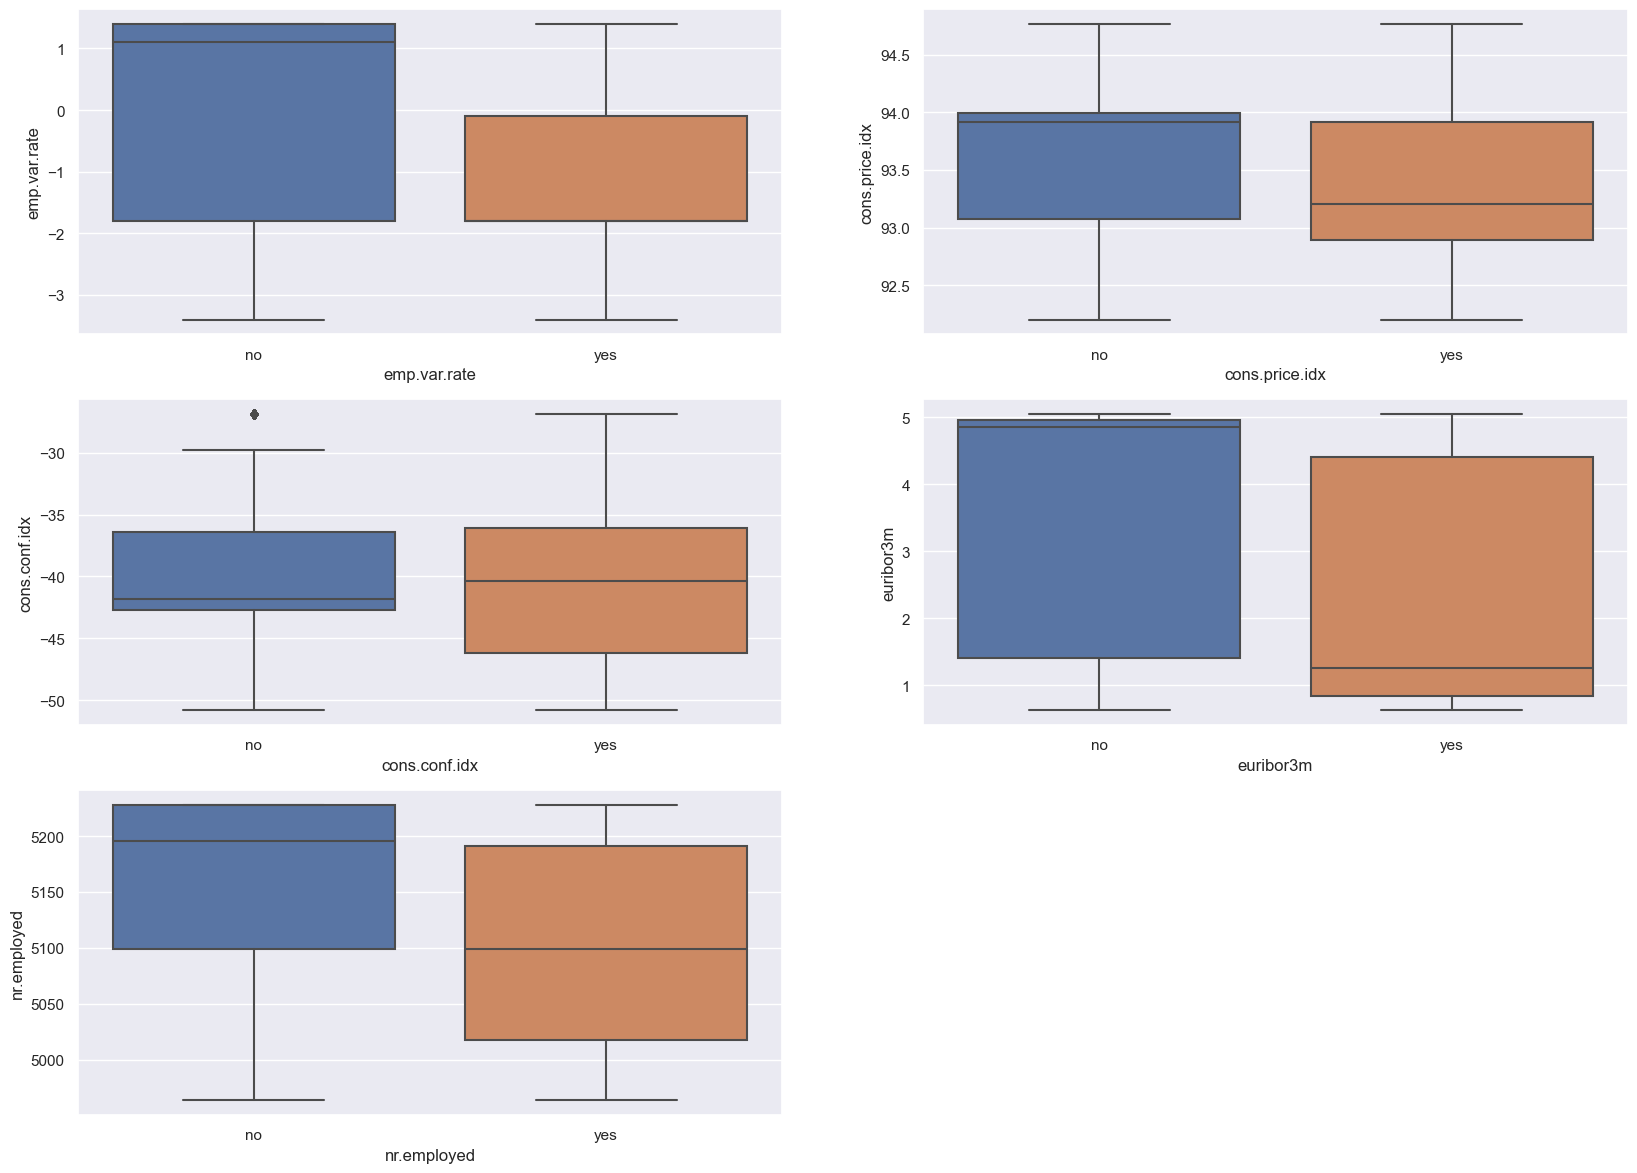

In [17]:
num_features = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.boxplot(x="y", y= df_bank_full[feature], data=df_bank_full)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()



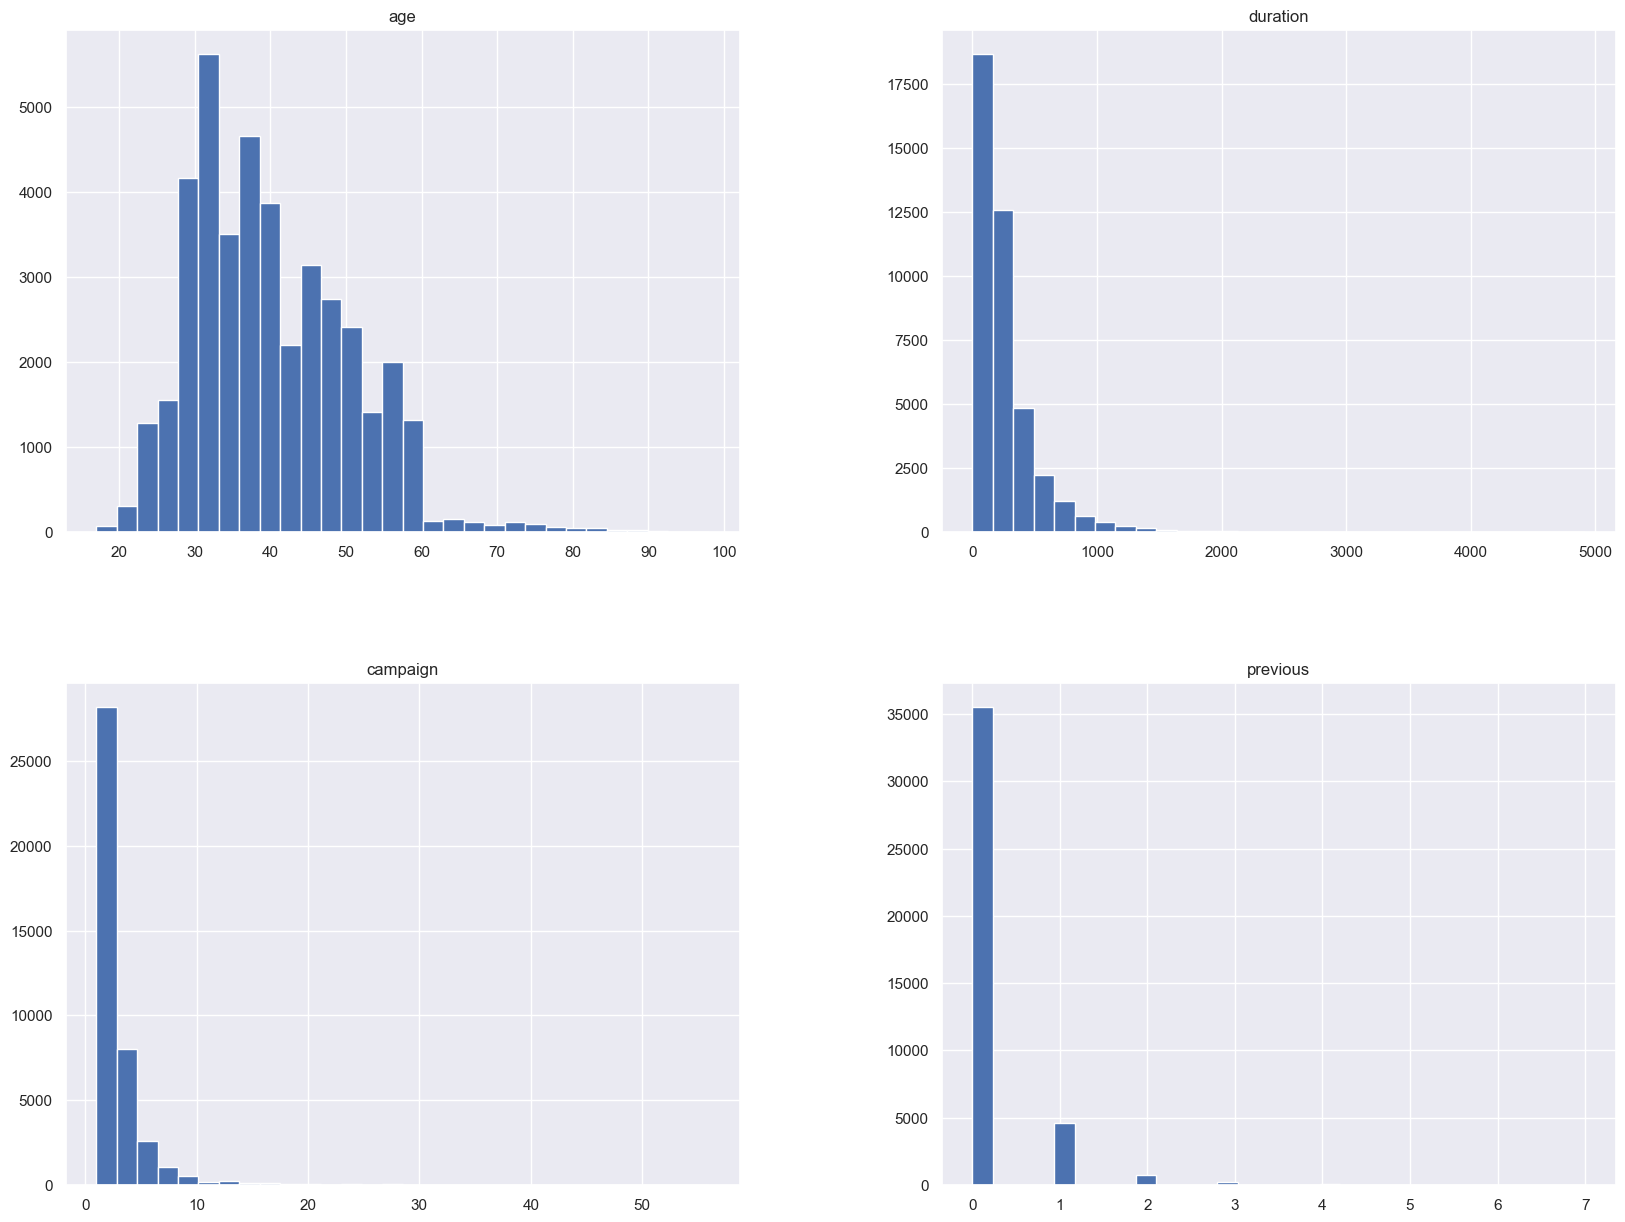

In [18]:
%matplotlib inline

df_bank_full[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

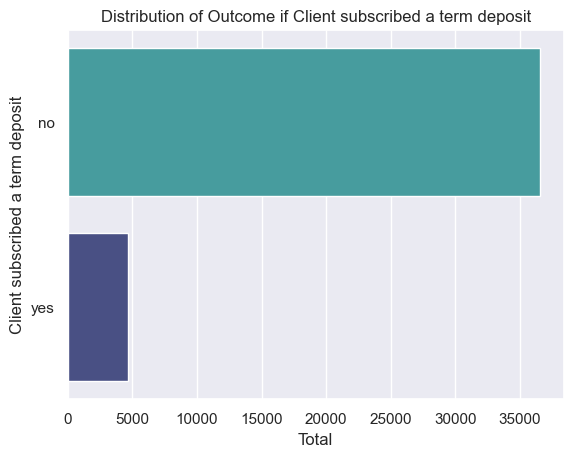

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(y="y", data=df_bank_full, palette="mako_r")
plt.title('Distribution of Outcome if Client subscribed a term deposit')
plt.ylabel('Client subscribed a term deposit')
plt.xlabel('Total')
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Business Objective 




Business Problem Statement:

The main objective of this project is to make the Portuguese bank's telemarketing campaign more effective. 
By performing data analysis, EDA and visualization we can determine the target customer profile which have the most success rate of subscribing to the term.  

We can identify  clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients. We also build and compare different classfication models to predict which clients are more likely to subscribe for term deposits (binary outcome: yes or no) based on various demographic and marketing campaign-related features.
This prediction can aid in optimizing marketing strategies and resource allocation for future campaigns, ultimately improving the bank's efficiency in acquiring term deposits.



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [20]:
X = df_bank_full.iloc[:,:7]
y = df_bank_full['y']

In [21]:
X.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes



Exploratory Data Analysis (EDA):
Checked for missing values: No missing values were found in the dataset.
Analyzed the distribution of the target variable ('y') using a count plot, showing a class imbalance.



Data Preprocessing:
Encode the data using Label Encoder for the target variable and one-hot encoding for categorical columns 
Balance imbalanced class using SMOTE




In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'y' column to numerical values
y = label_encoder.fit_transform(df_bank_full['y'])

In [23]:
# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=['job', 'marital',  'education', 'default', 'housing', 'loan'],dtype=float)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [26]:
from imblearn.over_sampling import SMOTE


In [27]:
# The dataset is imbalanced , so weare using SMOTE on the training data
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

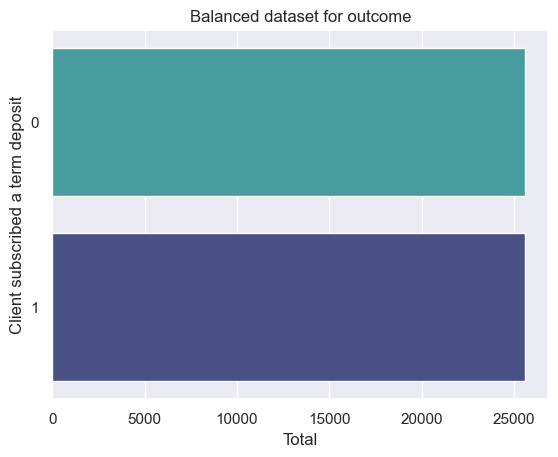

In [28]:
# After SMOTE, the 
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=X_train, palette="mako_r")
plt.title('Balanced dataset for outcome')
plt.ylabel('Client subscribed a term deposit')
plt.xlabel('Total')
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [29]:
LRclassifier = LogisticRegression()
t0 = time.time()
LRclassifier.fit(X_train, y_train)

#Calculate LR Training time
LRTrainTime = time.time()-t0

y_pred_train = LRclassifier.predict(X_train)
y_pred_test = LRclassifier.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate LR Train Accuracy
LRTrainAcc = accuracy_score(y_pred_train,y_train)

# Calculate LR Test Accuracy
LRTestAcc = accuracy_score(y_pred_test,y_test)

#classification report for LR model
print(classification_report(y_pred_test, y_test))

#Confusion matrix for LR model
print(confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.60      0.92      0.72      7108
           1       0.60      0.16      0.25      5249

    accuracy                           0.60     12357
   macro avg       0.60      0.54      0.49     12357
weighted avg       0.60      0.60      0.52     12357

[[6552 4416]
 [ 556  833]]


### Problem 9: Score the Model

What is the accuracy of your model?

In [30]:
print('Logistic Regression Train accuracy is: {:.2f}%'.format(LRTrainAcc*100))
print('Logistic Regression Test accuracy is: {:.2f}%'.format(LRTestAcc*100))
print('Logistic Regression Train Time is: {:.2f}'.format(LRTrainTime))

Logistic Regression Train accuracy is: 62.39%
Logistic Regression Test accuracy is: 59.76%
Logistic Regression Train Time is: 1.26


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Evaluate DecisionTreeClassifier 

In [31]:
from sklearn.tree import DecisionTreeClassifier
t0 = time.time()

DTclassifier = DecisionTreeClassifier()
t0 = time.time()
DTclassifier.fit(X_train, y_train)

DTCTrainTime = time.time()-t0
print("Training time:", time.time()-t0)

y_pred_train = DTclassifier.predict(X_train)
y_pred_test = DTclassifier.predict(X_test)

# Calculate LR Train Accuracy
DTCTrainAcc = accuracy_score(y_pred_train,y_train)
DTCTestAcc = accuracy_score(y_pred_test,y_test)

print('Decision Tree accuracy is: {:.2f}%'.format(DTCTestAcc*100))


print(classification_report(y_test, y_pred_test))
#Confusion matrix for Decision Tree model
print(confusion_matrix(y_test, y_pred_test))


Training time: 0.1497669219970703
Decision Tree accuracy is: 75.92%
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     10968
           1       0.17      0.30      0.22      1389

    accuracy                           0.76     12357
   macro avg       0.54      0.56      0.54     12357
weighted avg       0.82      0.76      0.79     12357

[[8971 1997]
 [ 979  410]]


In [32]:
print('Decision Tree Train accuracy is: {:.2f}%'.format(DTCTrainAcc*100))
print('Decision Tree Test accuracy is: {:.2f}%'.format(DTCTestAcc*100))
print('Decision Tree Train Time is: {:.2f}'.format(DTCTrainTime))

Decision Tree Train accuracy is: 87.75%
Decision Tree Test accuracy is: 75.92%
Decision Tree Train Time is: 0.15


### Evaluate SVC Classifier

In [ ]:
from sklearn.svm import SVC
SVCclassifier = SVC()
t0 = time.time()
SVCclassifier.fit(X_train, y_train)
SVCTrainTime = time.time()-t0
print("Training time:",SVCTrainTime)


y_pred_train = SVCclassifier.predict(X_train)
y_pred_test = SVCclassifier.predict(X_test)

# Calculate SVC Train Accuracy
SVCTrainAcc = accuracy_score(y_pred_train,y_train)
SVCTestAcc = accuracy_score(y_test,y_pred_test)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

print('SVC accuracy is: {:.2f}%'.format(SVCTestAcc*100))

In [ ]:
print('SVC Train accuracy is: {:.2f}%'.format(SVCTrainAcc*100))
print('SVC Test accuracy is: {:.2f}%'.format(SVCTestAcc*100))
print('SVC Train Time is: {:.2f}'.format(SVCTrainTime))

### Evaluate KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
t0 = time.time()
KNclassifier.fit(X_train, y_train)

KNNTrainTime = time.time()-t0
print("Training time:", KNNTrainTime)

y_pred_train = KNclassifier.predict(X_train)
y_pred_test = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

# Calculate KNN Train Accuracy
KNNTrainAcc = accuracy_score(y_pred_train,y_train)
KNNTestAcc = accuracy_score(y_pred_test,y_test)

print('K Neighbours accuracy is: {:.2f}%'.format(KNNTestAcc*100))

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

In [ ]:
print('KNN Train accuracy is: {:.2f}%'.format(KNNTrainAcc*100))
print('KNN Test accuracy is: {:.2f}%'.format(KNNTestAcc*100))
print('KNN Train Time is: {:.2f}'.format(KNNTrainTime))

Below is the comparision of the classifiers using the default settings for each model.

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM','Decision Tree' ], 
                        'Train Accuracy': [LRTrainAcc*100, KNNTrainAcc*100, SVCTrainAcc*100, DTCTrainAcc*100],
                        'Test Accuracy': [LRTestAcc*100, KNNTestAcc*100, SVCTestAcc*100, DTCTestAcc*100],
                        'Train Time': [LRTrainTime*100, KNNTrainTime*100, SVCTrainTime*100, DTCTrainTime*100]})




Compare the performance of the classifiers based on the evaluation metrics below : We can see the differences in their performance across different metrics like the Train an Test accuracy. Also another important aspect is the train time for each of the models.

In [ ]:
compare

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
#Run permutation importance to determine the relative importance of features
from sklearn.inspection import permutation_importance
result_train= permutation_importance(LRclassifier, X_train, y_train, n_repeats=10,
                                random_state=0, n_jobs=2)
sorted_idx_train = result_train.importances_mean.argsort()

result_test= permutation_importance(LRclassifier, X_test, y_test, n_repeats=10,
                                random_state=0, n_jobs=2)
sorted_idx_test = result_test.importances_mean.argsort();



In [ ]:
#Create a bar chart of permutation importance for train and test
fig, ax = plt.subplots(1,2, figsize = (15,10))
ax[0].barh(X_train.columns[sorted_idx_train], result_train.importances[sorted_idx_train].mean(axis=1).T)
ax[0].set_title("Permutation Importances (train set)")

ax[1].barh(X_test.columns[sorted_idx_test], result_test.importances[sorted_idx_test].mean(axis=1).T)
ax[1].set_title("Permutation Importances (test set)")

fig.tight_layout();

From the feature importance and coefficeints, we can drop columns which do not affect the term subscription.

In [ ]:
# Drop columns related to the 'unknown' category
unknown_columns = ['job_unknown','housing_unknown','loan_unknown','marital_unknown','education_illiterate','default_yes']

X_train.drop(unknown_columns, axis=1, inplace=True)
X_test.drop(unknown_columns, axis=1, inplace=True)

In [ ]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

In [ ]:
accuracy=[]
roc_auc=[]
F1_score=[]

# Train each classifier on the training set using appropriate parameters. Perfrom Cross-validation to tune hyperparameters and avoid overfitting.

### Fine tune LogisticRegression model 

In [ ]:
logreg_param_grid = {"C": np.logspace(-3, 3, 7),
                    "penalty": ["l1", "l2"],
                    "max_iter": [10000]}


LRclassifier = LogisticRegression(solver='liblinear')


lr_grid = GridSearchCV(LRclassifier, logreg_param_grid, cv=10, scoring='accuracy', n_jobs=-1, return_train_score=True)
lr_grid.fit(X_train, y_train)
mean_fit_time = lr_grid.cv_results_['mean_fit_time']

print(lr_grid.best_params_)

# Evaluate the model on the test set
test_accuracy = lr_grid.best_estimator_.score(X_test, y_test)
print("LR Train score  :", lr_grid.best_score_)
print("LR Test Accuracy :", test_accuracy)
print("LR Mean fit time :", mean_fit_time.mean() )


y_pred = lr_grid.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)

accuracy.append(LRAcc * 100 ) 
roc_auc.append((roc_auc_score(y_pred,y_test)*100) )
F1_score.append((f1_score(y_pred,y_test)* 100) )  
    
    
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))


In [ ]:
result_dict_train["LR GridSearch Train Score"] = lr_grid.best_score_
result_dict_test["LR GridSearch Test Score"] = lr_grid.score(X_test,y_test)

### Fine tune KNeighborsClassifier model 

In [ ]:
knn = KNeighborsClassifier(algorithm = "auto")
param_grid = {"n_neighbors": np.linspace(1, 20, 10, dtype=int).tolist(),
                  "metric": ["euclidean", "manhattan"]}
knn_cv = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1, return_train_score=True)
knn_cv.fit(X_train,y_train)

print("Hyperparameters:", knn_cv.best_params_)
print("Train Score:", knn_cv.best_score_)
print("Test Score:", knn_cv.best_estimator_.score(X_test, y_test))

mean_fit_time = knn_cv.cv_results_['mean_fit_time']
print("Mean fit time:", mean_fit_time)

y_pred = knn_cv.best_estimator_.predict(X_test)
KNNAcc = accuracy_score(y_pred,y_test)


accuracy.append(KNNAcc * 100 ) 
roc_auc.append((roc_auc_score(y_pred, y_test)*100) )
F1_score.append((f1_score(y_pred, y_test)* 100) ) 



In [ ]:
result_dict_train["KNN GridSearch Train Score"] = knn_cv.best_score_
result_dict_test["KNN GridSearch Test Score"] = knn_cv.score(X_test,y_test)


### Fine tune SVC model 

In [ ]:
params = {'kernel': ['rbf', 'poly'],
         'gamma': [0.1, 1.0],
         "C": [1, 10, 50]}


svc = SVC().fit(X_train, y_train)

grid = GridSearchCV(svc, param_grid=params, cv=10, scoring='accuracy',return_train_score=True).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)
best_kernel = grid.best_params_['kernel']
best_gamma = grid.best_params_['gamma']
mean_fit_time = grid.cv_results_['mean_fit_time']

print(best_kernel)
print(best_gamma)

# Evaluate the model on the test set
test_accuracy = grid.best_estimator_.score(X_test, y_test)
print("SVC Train score  :", grid.best_score_)
print("SVC Test Accuracy:", test_accuracy)
print("SVC Mean fit time :", mean_fit_time.mean() )

SVCAcc = accuracy_score(y_pred, y_test)


accuracy.append(SVCAcc * 100 ) 
roc_auc.append((roc_auc_score(y_pred, y_test)*100) )
F1_score.append((f1_score(y_pred, y_test)* 100) ) 


In [ ]:
result_dict_train["SVM GridSearch Train Score"] = grid.best_score_
result_dict_test["SVM GridSearch Test Score"] = grid.score(X_test,y_test)

### Fine tune Decision Tree Classifier  

In [ ]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [3, 5, 7, 10],
              'criterion' :['gini', 'entropy']
             }

DTclassifier = DecisionTreeClassifier()
dt_cv = GridSearchCV(DTclassifier, param_grid= params, cv=10, scoring='accuracy',return_train_score=True)
dt_cv.fit(X_train,y_train)
print("Best Parameters:",dt_cv.best_params_)
print("Train Score:",dt_cv.best_score_)
print("Test Score:",dt_cv.score(X_test,y_test))


y_pred = dt_cv.predict(X_test)
DTAcc = accuracy_score(y_pred, y_test)

accuracy.append(DTAcc * 100 ) 
roc_auc.append((roc_auc_score(y_pred, y_test)*100) )
F1_score.append((f1_score(y_pred, y_test)* 100) ) 

In [ ]:
result_dict_train["DecisionTree Train Score"] = dt_cv.best_score_
result_dict_test["DecisionTree Test Score"] = dt_cv.score(X_test,y_test)

### Comparision of the different classifiers after tuning hyperparameters for each model

In [ ]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

In [ ]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

In [ ]:
# ROC plot
from sklearn.metrics import plot_roc_curve
classifiers = [svc,knn , lr_grid, dt_cv]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test , y_test, ax=ax) 

ROC Curve a: Receiver Operating Characteristic (ROC) curve plots the true positive rate (recall) against the false positive rate for different classification thresholds. The Area Under the ROC Curve (AUC-ROC) summarizes the ROC curve into a single value, indicating the classifier's ability to distinguish between classes. It is useful for evaluating binary classifiers across different thresholds and is robust to class imbalance.

In [ ]:
def plot_roc_curve(fpr, tpr, label = None):   
    plt.plot(fpr, tpr, linewidth = 2, label= 'auc= '+ str(label))
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate(Recall)")
    plt.title("ROC Curve")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc=4)
    plt.show()

In [ ]:
model_name=[]
accuracy=[]
roc_auc=[]
F1_score=[]
models=[
    #tree models,boosting
    DecisionTreeClassifier(random_state=42),
    LogisticRegression(random_state=42),
    SVC(random_state=42)    
]

for model in models:
    model.fit(X_train , y_train)
    prediction = model.predict(X_test)
    y_predict=model.predict_proba(X_test)[:, 1]
    model_name.append(model.__class__.__name__)
    accuracy.append((accuracy_score( prediction , y_test ) * 100 ) )
    roc_auc.append((roc_auc_score(y_test , y_predict)*100) )
    F1_score.append((f1_score(y_test , prediction)* 100) )  

In [ ]:
models_df = pd.DataFrame({"Model-Name":model_name, "Accuracy": accuracy ,'AUC':roc_auc ,'F1-Score':F1_score})
#models_df = models_df.drop(columns='Model-Name').columns.astype(float)

#models_df.sort_values("AUC", ascending = False)
models_df

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='AUC',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: AUC Score')
plt.tight_layout()
plt.show()

#### Evaluate metrics for comparison

Accuracy measures the proportion of correctly classified term deposit subscriptions out of the total instances. This is a suitable metric as we have balanced the datasets and both the classes are evenly distributed. 

We also compare the F1 score to determine the mean of precision and recall ,since we want to consider both false positives and false negatives in this case while identifying if client did subscribe for the term.

#### Conclusion


Based on the evaluation results and our specific requirements, we can select the classifier that best meets your needs in terms of performance, interpretability, and computational efficiency.

By conducting exploratory data analysis and implementing various algorithms, we were able to gain valuable insights into the telemarketing dataset and develop a predictive model with a high level of accuracy.

This analysis demonstrates the application of various machine learning models to predict term deposit subscription based on client features and marketing campaign details. By leveraging these predictive models, the bank can optimize its marketing efforts and resource allocation, ultimately leading to improved efficiency and effectiveness in acquiring term deposits. 
 
We address the class imbalance issue by applying technique like oversampling (e.g., Synthetic Minority Over-sampling Technique - SMOTE) 

From the evaluated classifiers, Logistic Regression and SVM achieved the highest accuracy scores, around 91%.
SVM classifier after hyperparameter tuning have a good scores.
Decision Tree Classifier showed relatively lower accuracy but provided insights into feature importance.
KNN classifier has worst score in three clasifiers.

If idenitfying the factors are critical and interpreatability is concerned, Decision tree is a good choice since the decision-making process is represented as a tree structure. 
For computational efficiency, Decision Tree is a good choice with lowest train time.
